Name - Jagadish

# CENSUS INCOME CATEGORY PREDICTION

• Build a Decision Tree model with the dataset. You are free to do any kind of EDA (using all statistical tools and methodology taught in session) as per your choice and play around with the data. Following are the must have things for submission of project :

        ♦ Proper EDA with explanation of impactful and useful variables
        ♦ Graphs wherever necessary
        ♦ Metrics for model evaluation:
                ♦ Confusion Matrix
                ♦ Accuracy Score
                ♦ F1 score, Precision, Recall, ROC-AUC 
                ♦ Model Optimization using K fold cross validation
                
• Also ensure that you use Data file and split it into train and test to build the model

• Consider column O (income) as the target (y) variable and rest of the columns as feature variables.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [2]:
data = pd.read_csv('Data.csv')

# view of dataset
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


Insight : There are 32,561 Rows and 15 Columns.

In [3]:
# Basic Information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
# Statistical Summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


##### Checking Missing Values

<AxesSubplot:>

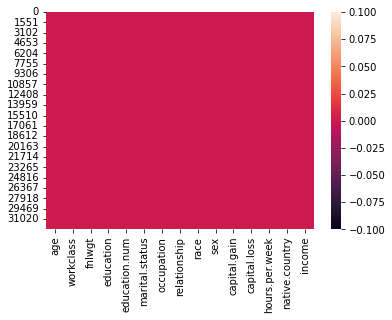

In [5]:
sns.heatmap(data.isnull())

Insight : There are no missing values.
    
##### Note : But we know that missing values are present in the form of "?" which needs to be preprocessed.

### Exploratory Data Analysis

#### Checking Distribution of Income

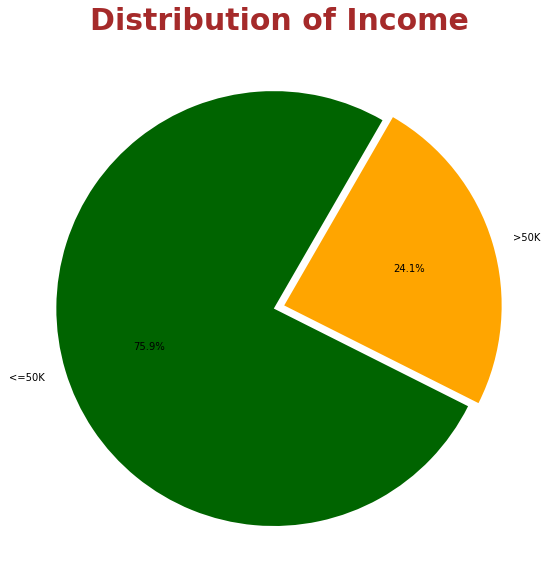

In [6]:
# Creating a pie chart of income
plt.figure(figsize=(10,10))
plt.title("Distribution of Income", fontsize=30, fontweight='bold', color='brown')

g = plt.pie(data.income.value_counts(),
            explode=(0.025,0.025), 
            labels=data.income.value_counts().index, colors=['darkgreen', 'orange'], 
            autopct='%1.1f%%', 
            startangle=60)

plt.show()

Insight : The dependent feature 'income' contains 75.9% values have income less than 50K and 24.1% values have income more than 50K. So it's clear that the dataset is not balanced.

#### Checking Distribution for 'Age'

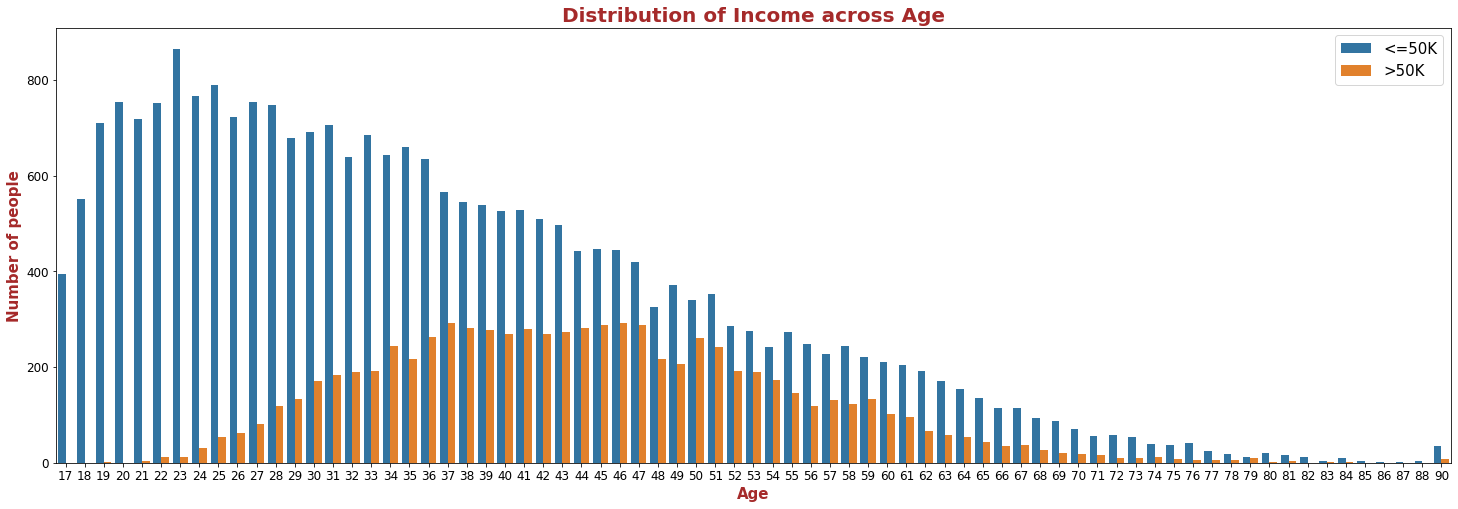

In [7]:
# Creating a countplot of income across age
plt.figure(figsize=[25,8])
sns.countplot(data['age'], hue=data['income'])
plt.title('Distribution of Income across Age', fontsize = 20, fontweight='bold', color='brown')
plt.xlabel('Age', fontsize = 15, fontweight='bold', color='brown')
plt.ylabel('Number of people', fontsize = 15, fontweight='bold', color='brown')
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

On taking a look at the result of distribution plot for "age" column, I can see that the most no of people are young.

#### Checking Workclass Distribution

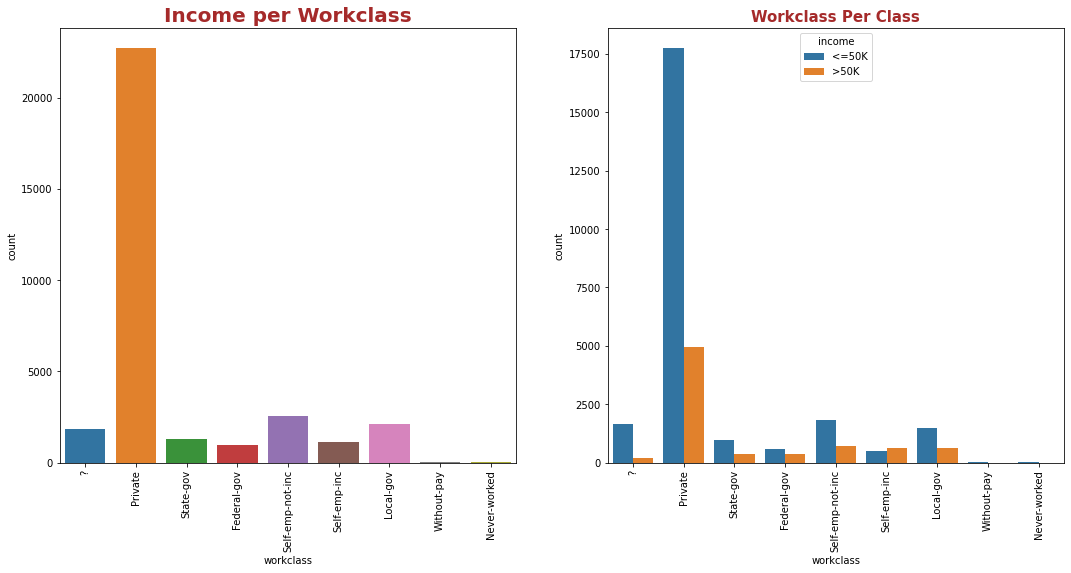

In [8]:
# Countplot for workclass column
plt.figure(figsize=[18,8])
plt.subplot(1,2,1)
sns.countplot(data['workclass'])
plt.title("Income per Workclass", fontsize = 20, fontweight='bold', color='brown')
plt.xticks(rotation=90)

# Countplot for workclass per class
plt.subplot(1,2,2)
sns.countplot(data=data, x='workclass', hue='income')
plt.title("Workclass Per Class", fontsize = 15, fontweight='bold', color='brown')
plt.xticks(rotation=90)
plt.show()

##### Insight :
    
   ♦ Data say most number of people are working in private sector.
   
   ♦ As we can see the second plot that who have an annual income is more than 50K or less than 50K are work in private sector.

#### Checking Distribution of Education

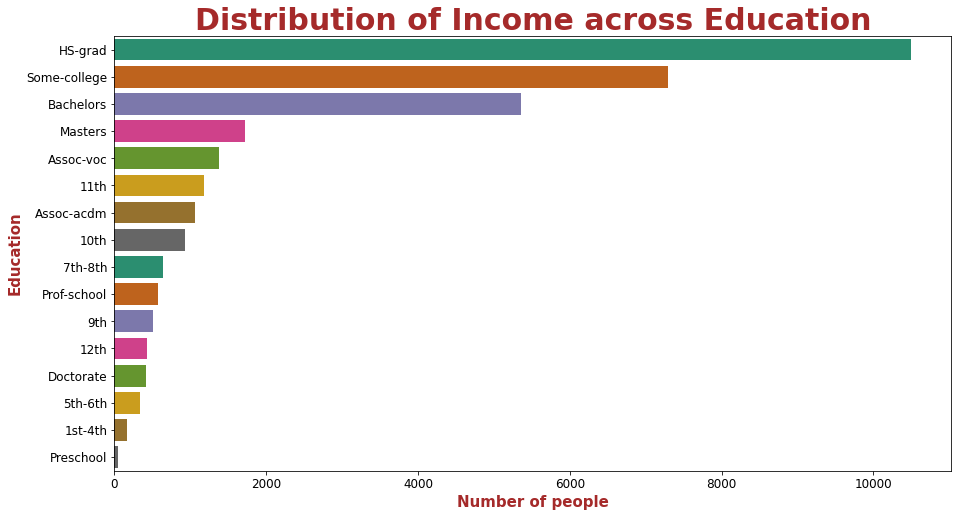

In [9]:
# Creating a barplot for 'Education'
edu = data['education'].value_counts()

plt.figure(figsize=(15, 8))
sns.barplot(edu.values, edu.index, palette='Dark2')
plt.title('Distribution of Income across Education', fontsize=30, fontweight='bold', color='brown')
plt.xlabel('Number of people', fontsize=15, fontweight='bold', color='brown')
plt.ylabel('Education', fontsize=15, fontweight='bold', color='brown')
plt.tick_params(labelsize=12)
plt.show()

Insight : We can see most number of people are high school graduates.

In [10]:
edu = data['education'].unique()

for edu_class in edu:
    print("{}, The Education number is {}".format(edu_class, data[data['education'] == edu_class]['education.num'].unique()))

HS-grad, The Education number is [9]
Some-college, The Education number is [10]
7th-8th, The Education number is [4]
10th, The Education number is [6]
Doctorate, The Education number is [16]
Prof-school, The Education number is [15]
Bachelors, The Education number is [13]
Masters, The Education number is [14]
11th, The Education number is [7]
Assoc-acdm, The Education number is [12]
Assoc-voc, The Education number is [11]
1st-4th, The Education number is [2]
5th-6th, The Education number is [3]
12th, The Education number is [8]
9th, The Education number is [5]
Preschool, The Education number is [1]


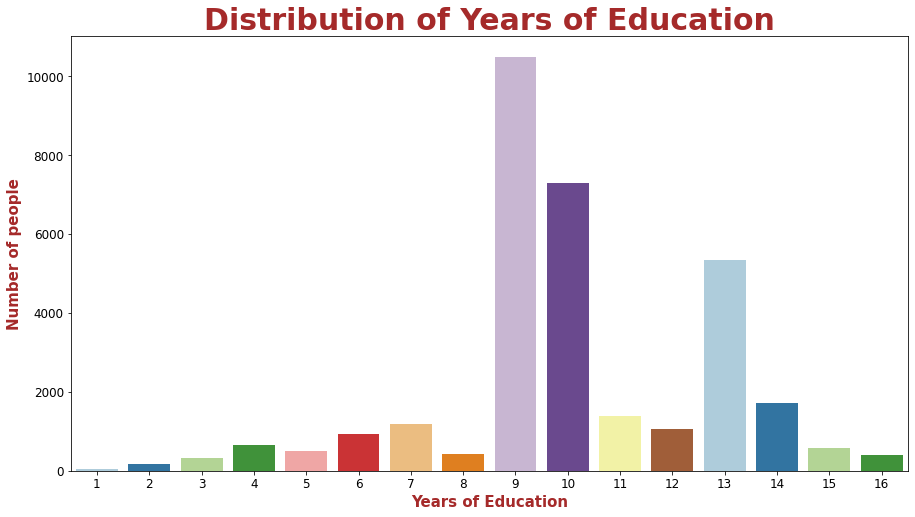

In [11]:
# Creating a barplot for 'Years of Education'
edu_num = data['education.num'].value_counts()

plt.figure(figsize=(15, 8))
sns.barplot(edu_num.index, edu_num.values, palette='Paired')
plt.title('Distribution of Years of Education', fontsize=30, fontweight='bold', color='brown')
plt.xlabel('Years of Education', fontsize=15, fontweight='bold', color='brown')
plt.ylabel('Number of people', fontsize=15, fontweight='bold', color='brown')
plt.tick_params(labelsize=12)

plt.show()

Insight : From the above analysis, It's clear that "education" & "education.num" columns are same. so I will drop "education.num" column.

In [12]:
# dropping "education.num" column
data.drop(labels='education.num', axis=1, inplace=True)
data.head()

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


Now "education.num" column has been removed from dataframe.

#### Checking Distribution of Gender ("sex")

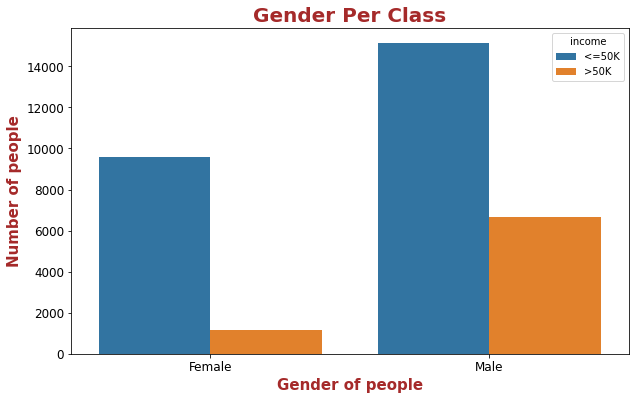

In [13]:
# Count Plot For Gender Per Class
plt.figure(figsize=(10, 6))
sns.countplot(x='sex' , data=data, hue='income')
plt.title("Gender Per Class", fontsize=20, fontweight='bold', color='brown')
plt.xlabel('Gender of people', fontsize=15, fontweight='bold', color='brown')
plt.ylabel('Number of people', fontsize=15, fontweight='bold', color='brown')
plt.tick_params(labelsize=12)

plt.show()

Insight :
    
    ♦ The number of male candidates are more than female candidates.
    
    ♦ When comparing Male and Female, more percentage of male candidates are earn more than 50K.

#### Checking Distribution of Maritial Status

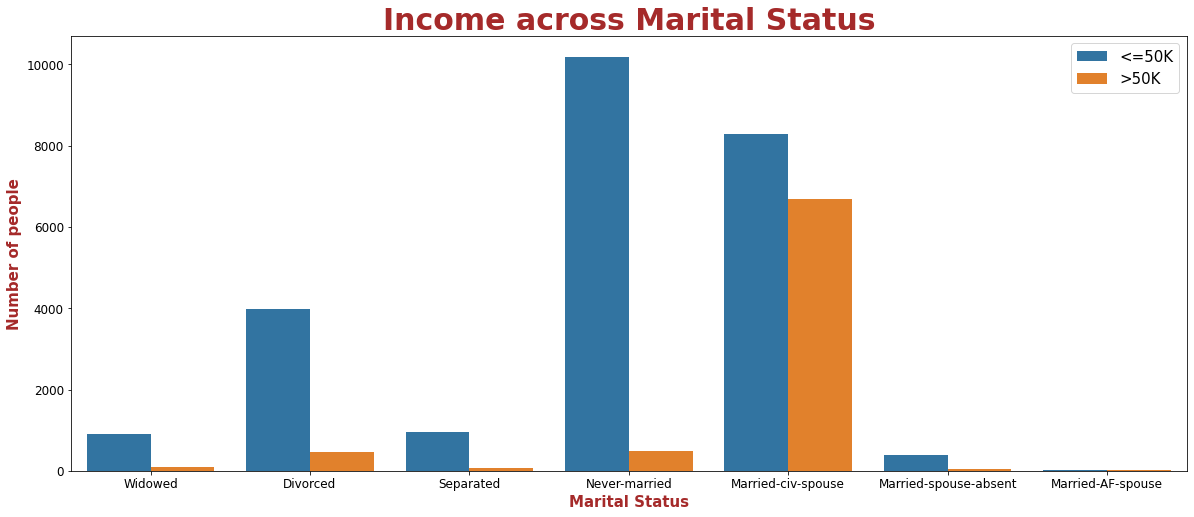


 --Value Counts-- 

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64


In [14]:
# Creating a countplot of income across Marital Status

plt.figure(figsize=(20, 8))
sns.countplot(data['marital.status'], hue=data['income'])
plt.title('Income across Marital Status', fontsize=30, fontweight='bold', color='brown')
plt.xlabel('Marital Status', fontsize=15, fontweight='bold', color='brown')
plt.ylabel('Number of people', fontsize=15, fontweight='bold', color='brown')
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

print('\n --Value Counts-- \n')
print(data['marital.status'].value_counts())

##### Insight :
    
    ♦ Most of the people whose annual income is more than 50K and they are married person.

#### Checking Relationship Distribution

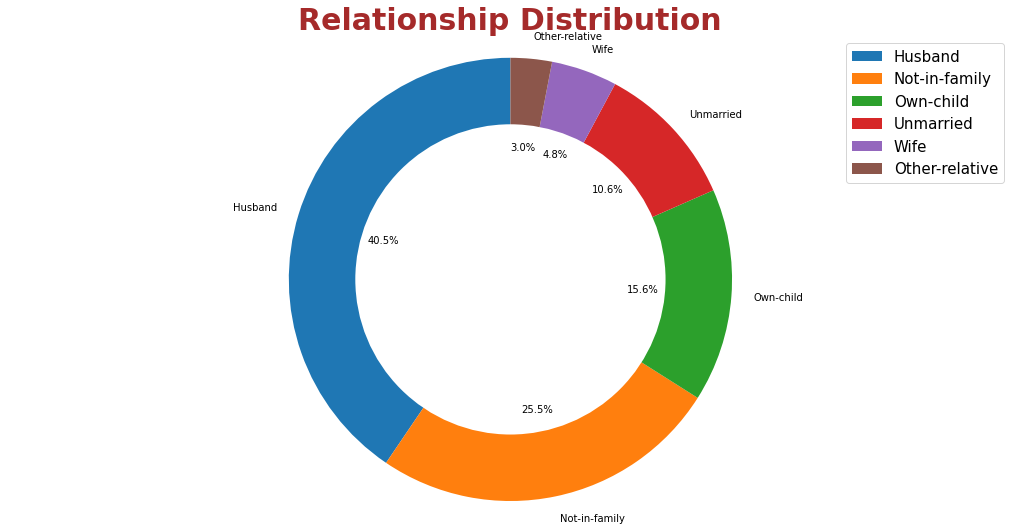


 --Value Counts-- 

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64


In [15]:
# Creating a donut chart for 'Age'
relation = data['relationship'].value_counts()

plt.figure(figsize=(18, 9))
plt.pie(relation.values, labels=relation.index, startangle=90, autopct='%1.1f%%')

centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Relationship Distribution', fontsize=30, fontweight='bold', color='brown')
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

print('\n --Value Counts-- \n')
print(data['relationship'].value_counts())

#### Checking Income across Race

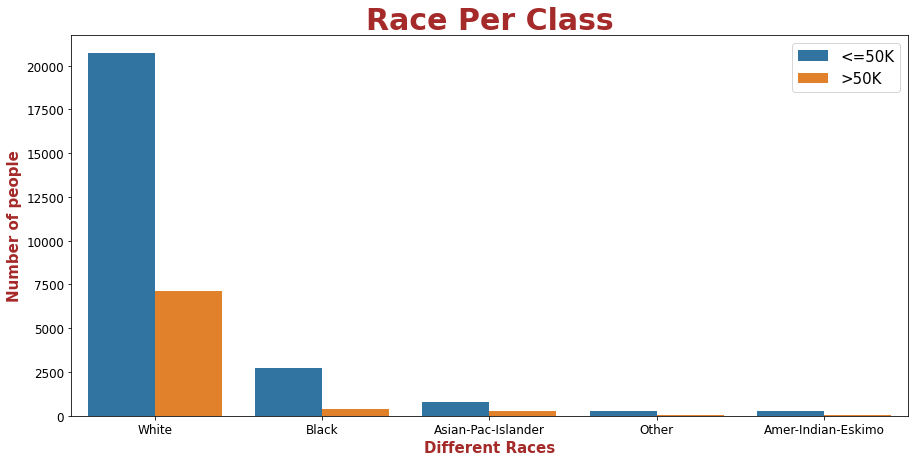

In [16]:
# Creating countplot

plt.figure(figsize=[15,7])
sns.countplot(data['race'], hue=data['income'])
plt.title('Race Per Class', fontsize=30, fontweight='bold', color='brown')
plt.xlabel('Different Races', fontsize=15, fontweight='bold', color='brown')
plt.ylabel('Number of people', fontsize=15, fontweight='bold', color='brown')
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})

plt.show()

##### Insight :
    
    ♦ As we saw is that majority of information about white race is more while all other races are lesser.

#### Checking Country wise Income

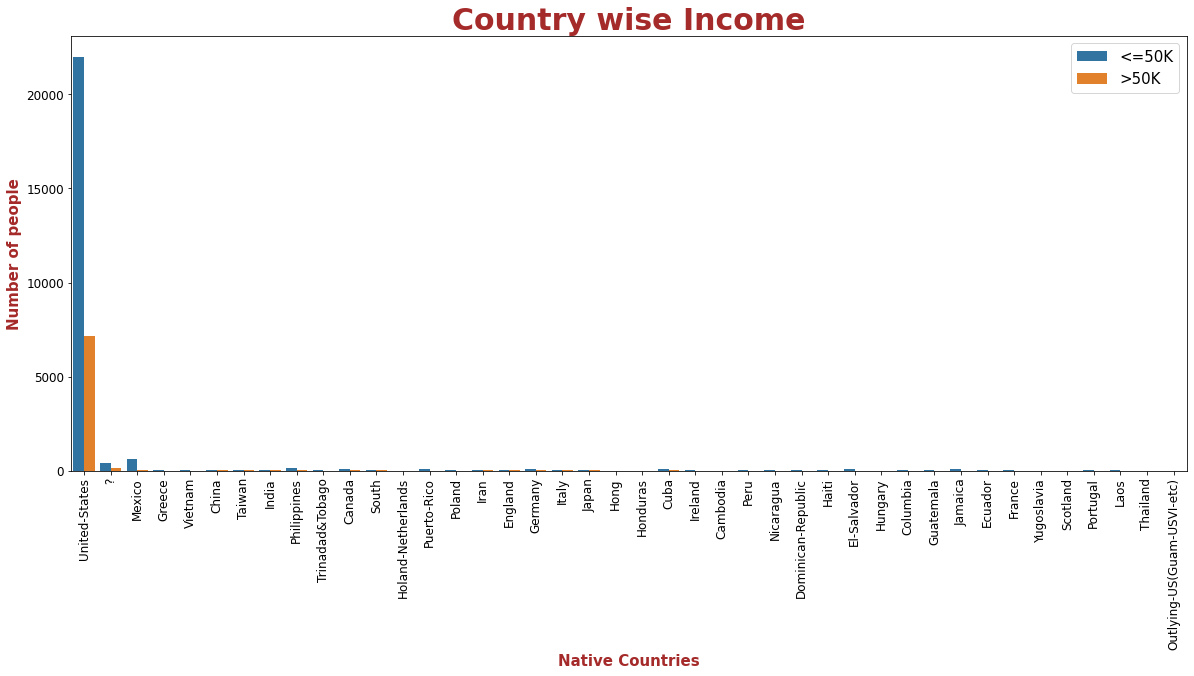


 Summary :- 

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece       

In [17]:
plt.figure(figsize=[20,8])
sns.countplot(data['native.country'], hue=data['income'])
plt.title('Country wise Income', fontsize=30, fontweight='bold', color='brown')
plt.xlabel('Native Countries', fontsize=15, fontweight='bold', color='brown')
plt.ylabel('Number of people', fontsize=15, fontweight='bold', color='brown')
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.xticks(rotation=90)
plt.show()

print('\n Summary :- \n')
print(data['native.country'].value_counts())

print('\n-----------------------------------')
print("{}% people from united states.".format(round(len(data[data['native.country']=='United-States'])/32561*100,2)))

print("{}% people from other countries.".format(round(len(data[data['native.country']!='United-States'])/32561*100,2)))

##### Insight :
    
    ♦ We can see that 89.59% people are from United States and only 10.41% people from other countries.

#### Checking Distribution of Occupation

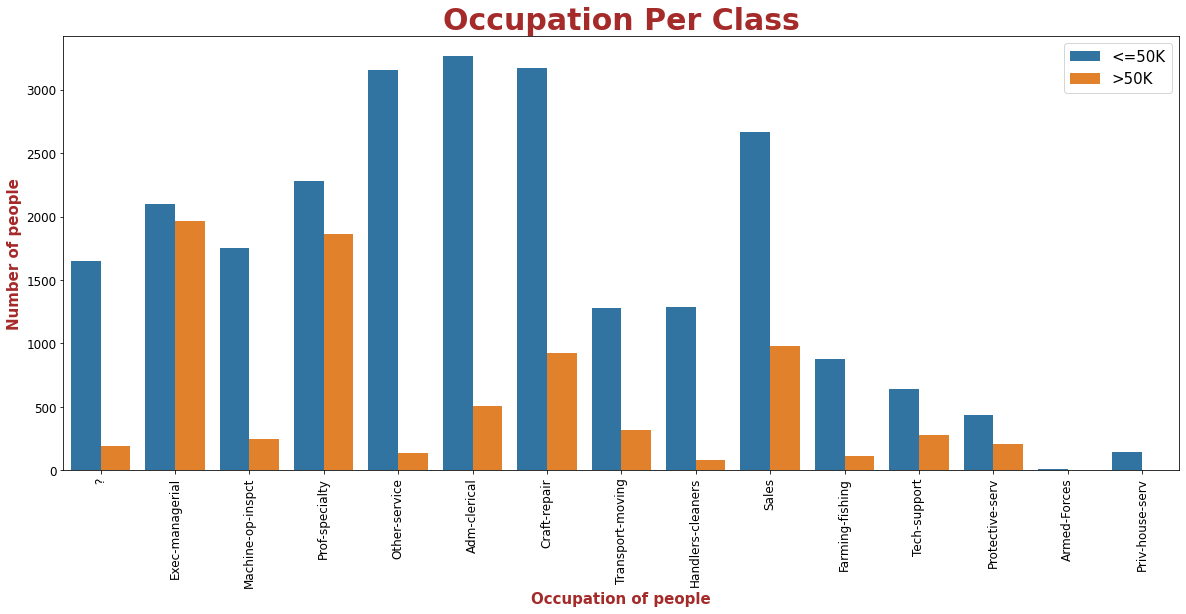

In [18]:
## Creating countplot

plt.figure(figsize=[20,8])
sns.countplot(data['occupation'], hue=data['income'])
plt.title('Occupation Per Class', fontsize=30, fontweight='bold', color='brown')
plt.xlabel('Occupation of people', fontsize=15, fontweight='bold', color='brown')
plt.ylabel('Number of people', fontsize=15, fontweight='bold', color='brown')
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.xticks(rotation=90)
plt.show()

• In occupation column the values are well distributed in all categories.

#### Checking Income across hours per week

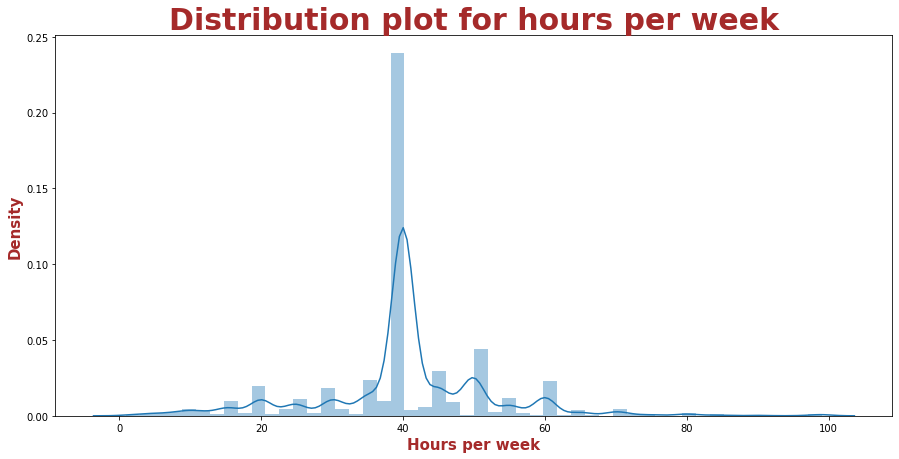

In [19]:
# Distribution plot for hours per week column

plt.figure(figsize=[15,7])
sns.distplot(data['hours.per.week'])
plt.title('Distribution plot for hours per week', fontsize=30, fontweight='bold', color='brown')
plt.xlabel('Hours per week', fontsize=15, fontweight='bold', color='brown')
plt.ylabel('Density', fontsize=15, fontweight='bold', color='brown')
plt.show()

##### Insight :
    
    ♦ By looking distribution plot for hours per weak column our data is aligned around the centre.
    
    ♦ In this dataset most of the people work approximately 30 to 40 hours per week.

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [21]:
data['income'] = le.fit_transform(data['income'])

#### Creating a pairplot of dataset

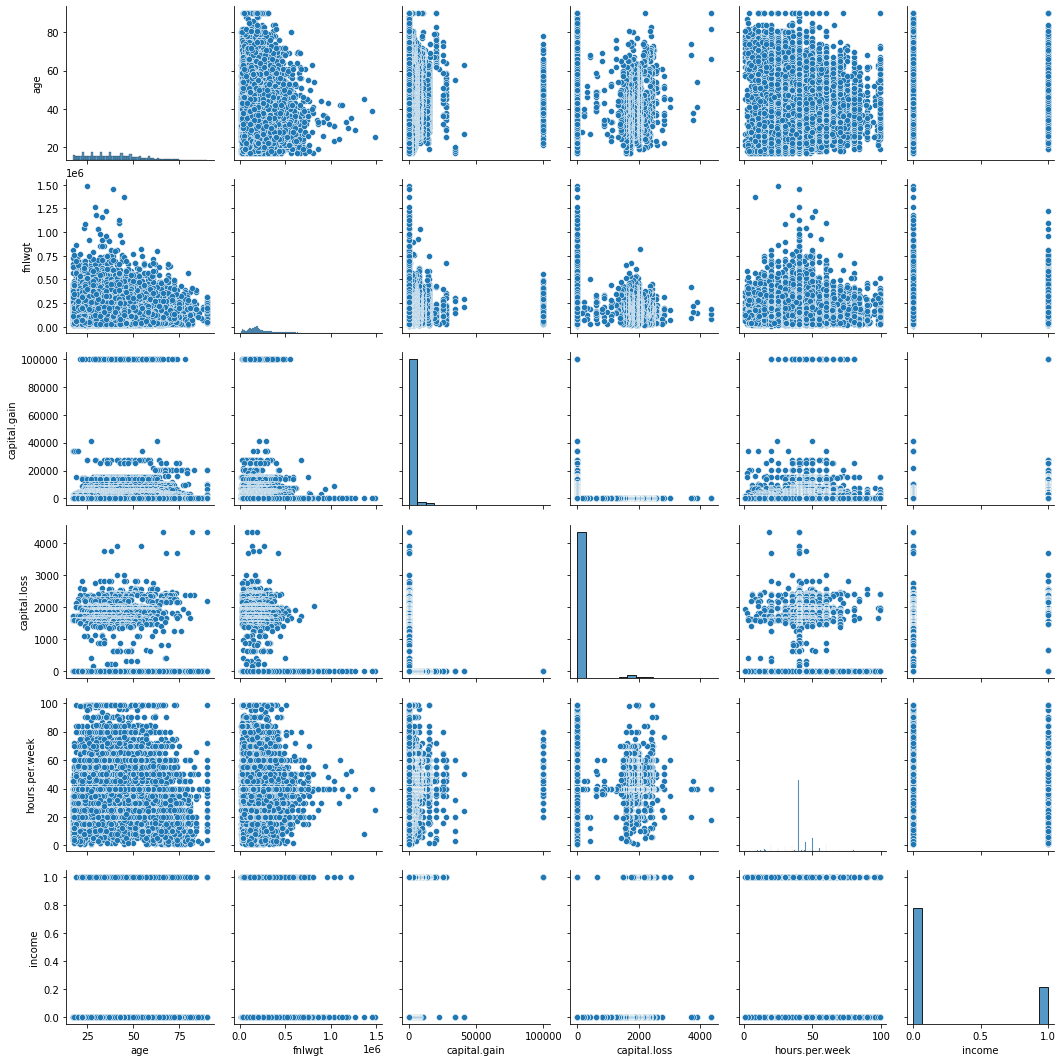

In [22]:
# Creating a pairplot
sns.pairplot(data)
plt.show()

#### Checking Correlation

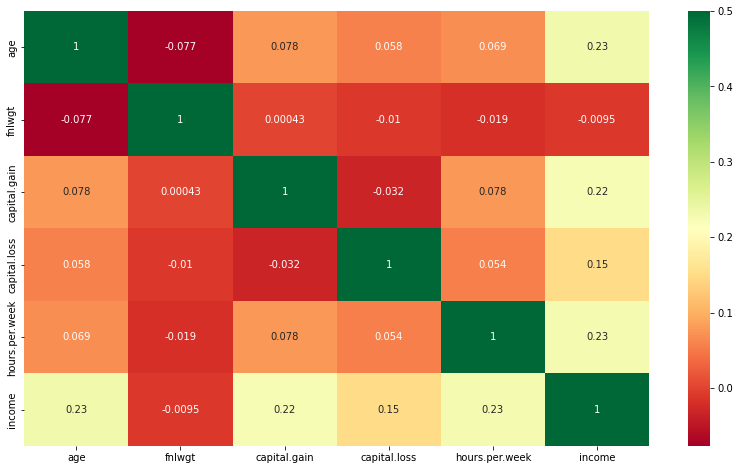

In [23]:
# Correlation Heatmap
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', vmax=.5)
plt.show()

#### Insight :
we can see that the target variable 'income' is highly correlated with age, capital gain and number of hours per week.

### Data Preprocessing

As we know that missing values are present in the form of "?" which needs to be preprocessed.

In [24]:
data = data.replace('?', np.nan)

In [25]:
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [26]:
nan_columns = ['workclass', 'occupation', 'native.country']

In [27]:
# Filling Missing Values(?)

for col in nan_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

#### Again Checking Missing Values

In [28]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Now, missing values have been replaced.

### Label Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
for col in data.columns:
    if data[col].dtypes == 'object':
        encoder = LabelEncoder()
        data[col] = encoder.fit_transform(data[col])

### Feature Selection

In [31]:
X = data.drop('income', axis=1)
y = data['income']

### Feature Scaling

In [32]:
## Feature scaling on training data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X[['age', 'capital.gain', 'capital.loss', 'hours.per.week']])

StandardScaler()

In [33]:
input_scaled = scaler.transform(X[['age', 'capital.gain', 'capital.loss', 'hours.per.week']])
scaled_data = pd.DataFrame(input_scaled,columns=['age', 'capital.gain', 'capital.loss', 'hours.per.week'])

In [34]:
X_scaled = scaled_data.join(X.drop(['age', 'capital.gain', 'capital.loss', 'hours.per.week'], axis=1))

#### Fixing imbalanced dataset

In [35]:
#!pip install imblearn

In [36]:
# Fixing imbalanced dataset by oversampling

from imblearn.over_sampling import RandomOverSampler

rd_over_sample = RandomOverSampler()
X_sampled, y_sampled = rd_over_sample.fit_resample(X_scaled, y)

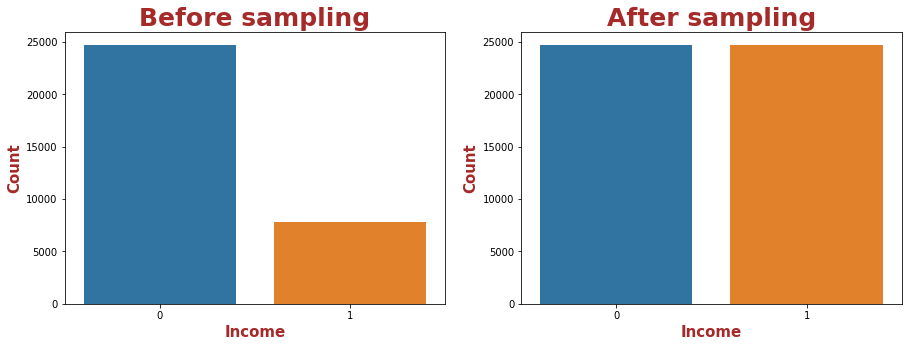

Before sampling : 
0    24720
1     7841
Name: income, dtype: int64

After sampling : 
0    24720
1    24720
Name: income, dtype: int64


In [37]:
# Plotting Before sampling
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.countplot(data['income'])
plt.title("Before sampling", fontsize=25, fontweight='bold', color='brown')
plt.xlabel('Income', fontsize=15, fontweight='bold', color='brown')
plt.ylabel('Count', fontsize=15, fontweight='bold', color='brown')

# Plot After sampling
plt.subplot(1,2,2)
sns.countplot(y_sampled.squeeze())
plt.title("After sampling", fontsize=25, fontweight='bold', color='brown')
plt.xlabel('Income', fontsize=15, fontweight='bold', color='brown')
plt.ylabel('Count', fontsize=15, fontweight='bold', color='brown')
plt.show()

print('Before sampling : \n{}'.format(y.value_counts()))
print('\nAfter sampling : \n{}'.format(y_sampled.value_counts()))

### Splitting into Training and Testing Data

In [38]:
# Split data into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=0)

In [39]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (39552, 13)
X_test shape: (9888, 13)
y_train shape: (39552,)
y_test shape: (9888,)


### Building A Decision Tree Model 

In [40]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Now Predicting

In [41]:
y_pred = dt.predict(X_test)

y_pred1 = dt.predict(X_train)

### Test Data Accuracy

In [42]:
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy Score is ", accuracy_score(y_test, y_pred))

Accuracy Score is  0.9139360841423948


In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      4954
           1       0.87      0.97      0.92      4934

    accuracy                           0.91      9888
   macro avg       0.92      0.91      0.91      9888
weighted avg       0.92      0.91      0.91      9888



### Making The Confusion Matrix

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4242  712]
 [ 139 4795]]


<AxesSubplot:>

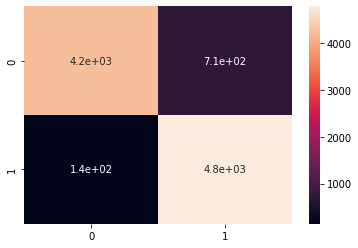

In [45]:
sns.heatmap(cm, annot=True)

### ROC-AUC

In [46]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred)
print("AUC Score is ", auc)

AUC Score is  0.9140529433414081


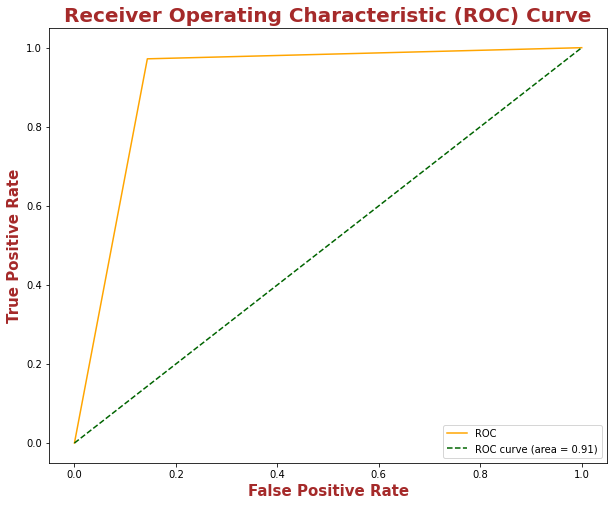

In [47]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkgreen', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate', fontsize=15, fontweight='bold', color='brown')
plt.ylabel('True Positive Rate', fontsize=15, fontweight='bold', color='brown')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=20, fontweight='bold', color='brown')
plt.legend()
plt.show()

### K-Fold Cross Validation

In [48]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.90089748 0.89811655 0.90176991 0.90202276 0.8977244 ]


###### We can summarize the cross-validation accuracy by calculating its mean.

In [49]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.9001


# Conclusion :
    
   ♦ So I used Decision Tree Classifier Model for prediction and I got Accuracy score of 0.91, 0.90 K-Fold and 0.91 AUC score.
    
   ♦ Used multiple Performance metrics to ensure that the model is performing correctly and is not overfitting on the data.
    
   ♦ In this dataset I found out that most number of people, Who had been earning more than $50K, they were working in private sector.
    
   ♦ While doing exploratory analysis, I found out that the most number of people are young. But relatively less young people who have an annual income is more than $50K.
    
   ♦ In this dataset the most number of people are Young, White race, Male, High school graduates with 9 to 10 years of education, Work approximately 30-40 hours per week and mostly they are from United States of America.

                                                 •••••○○○○○○•••••